In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pdb
import pickle
%matplotlib inline

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In /Users/wangtaiyi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/wangtaiyi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/wangtaiyi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/wangtaiyi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/wangtaiyi/opt/anac

```
test_query_times.csv # μ, σ of runtimes over repeated runs per query
test_by_query.csv 
test_index_set_stats.csv # 1st line is index set size, 2nd line is index set

train_times.txt 
train_agent_times.txt
train_system_times.txt
train_query_times.txt # sum of runtimes per episode # TODO change to an avg?

train_rewards.txt # sum of rewards per episode

train_index_set_stats.csv # actions taken in cols 0-2; size of index in col 3 per episode

```

In [4]:
import os
res_path="/Users/wangtaiyi/Documents/Graduate/Cambridge/Research/RL/Learning_Index_Selection/index_Code/Multi-level_Index/res"
os.chdir(res_path) 
dirs = !ls -rt
ratio_latency_dqn_spg = []
ratio_idx_size_dqn_spg = []
dirs

['tpch_05-20-22_16:47',
 'tpch_05-20-22_16:52',
 'tpch_05-23-22_20:30',
 'tpch_05-20-22_16:56',
 'tpch_05-23-22_20:22',
 'tpch_05-23-22_23:10',
 'tpch_05-23-22_23:53',
 'tpch_05-25-22_14:34',
 'tpch_05-25-22_15:21',
 'tpch_05-25-22_15:39',
 'tpch_05-25-22_15:51',
 'tpch_05-25-22_16:08',
 'tpch_05-25-22_16:21',
 'tpch_05-23-22_23:42',
 'tpch_05-20-22_16:54',
 'tpch_05-25-22_16:35',
 'tpch_05-25-22_16:43']

In [5]:
res_dir = dirs[-1]
res_dir 

'tpch_05-25-22_16:43'

## test results

In [8]:
query_time_μs = []
query_time_μ_σs = []

query_time_80s = []
query_time_99s = []

index_set_sizes = []
avg_idx_creation_times_uesd=[]
agents = ['default', 'tuner','dqn']



for agent in agents:
    
    res_subdir = res_dir + '/' + agent
    
    test_query_times = np.loadtxt(os.path.join(res_subdir, 'test_query_times.txt'), delimiter=',')

    # take avg within queries
    per_query_times_μs = np.mean(test_query_times, axis=1) # (n_queries, n_executions_per_query)
    per_query_times_σs = np.std(test_query_times, axis=1)
    
    # then take avg, 90th, 99th percentile across queries
    query_time_μs.append(np.mean(per_query_times_μs))
#     query_time_μ_σs.append(np.std(per_query_times_μs))
    query_time_μ_σs.append(np.mean(per_query_times_σs))
    
    query_time_80s.append(np.percentile(per_query_times_μs, 80))
    query_time_99s.append(np.percentile(per_query_times_μs, 99))


    with open(os.path.join(res_subdir, 'test_index_set_stats.csv'), 'rb') as f:
            test_index_set_stats = pickle.load(f)
        
    index_set_size = test_index_set_stats[0]
    index_set_sizes.append(index_set_size)

    if agent == 'dqn' or agent == 'tuner':
        idx_creation_times = np.loadtxt(os.path.join(res_subdir, 'test_idx_times.txt'), delimiter=',')

        avg_idx_creation_times = np.mean(idx_creation_times , axis=0)
        avg_idx_creation_time = np.mean(avg_idx_creation_times)
        avg_idx_creation_times_uesd.append( avg_idx_creation_time)
print(agents)

print( 'avg query time:', query_time_μs )
print( '99th latency', query_time_99s)

print( 'idx set sizes:',index_set_sizes )

print( 'idx creation time:', avg_idx_creation_times_uesd)
print( '80th latency', query_time_80s)

['default', 'tuner', 'dqn']
avg query time: [0.5500894241555565, 0.20425588042962942, 0.2448425834148195]
99th latency [0.9408210559599934, 0.7805842201866564, 0.4552593487066603]
idx set sizes: [244.5390625, 3954.9921875, 910.0390625]
idx creation time: [14.307541137506664, 9.549396001555566]
80th latency [0.7993722485999949, 0.36301405366671147, 0.37739211613331924]


In [42]:
ratio_latency = query_time_99s[3]/query_time_99s[4]
ratio_latency_dqn_spg.append(ratio_latency)
print(ratio_latency_dqn_spg)
ratio_idx_size = index_set_sizes[3]/index_set_sizes[4]
ratio_idx_size_dqn_spg.append(ratio_idx_size)
print(ratio_idx_size_dqn_spg)

[0.8727375061473067]
[14.103670809239322]


/Users/wangtaiyi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator


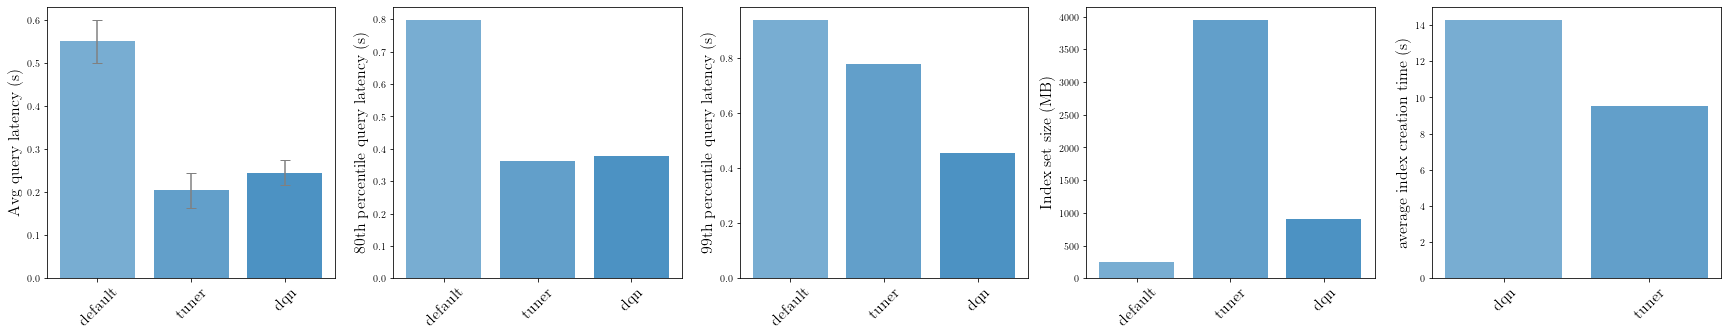

In [10]:
fig = plt.figure(figsize=(30,5))    

fs = 16

bar_labels = agents
bar_locs = np.arange(len(agents))
rgb = list(matplotlib.colors.to_rgb('C0')) # default blue
colors = list(map(lambda alpha: tuple(rgb + [alpha]), [.6,.7,.8,.9,1.0]))

ylim = 5

# 
ax_1 = fig.add_subplot(1,5,1)
bars_1 = ax_1.bar(x=bar_locs,
                  height=query_time_μs,
                  yerr=query_time_μ_σs, capsize=5, ecolor='gray',
                  color=colors)
ax_1.set_xticks(bar_locs)
ax_1.set_xticklabels(bar_labels, fontsize=fs, rotation=45)
ax_1.set_ylabel('Avg query latency (s)', fontsize=fs)
#ax_1.set_ylim([0,ylim])

#
ax_2 = fig.add_subplot(1,5,2)
bars_2 = ax_2.bar(x=bar_locs,
                  height=query_time_80s,
                  color=colors)
ax_2.set_xticks(bar_locs)
ax_2.set_xticklabels(bar_labels, fontsize=fs, rotation=45)
ax_2.set_ylabel('80th percentile query latency (s)', fontsize=fs)
#ax_2.set_ylim([0,ylim])

#
ax_3 = fig.add_subplot(1,5,3)
bars_3 = ax_3.bar(x=bar_locs,
                  height=query_time_99s,
                  color=colors)
ax_3.set_xticks(bar_locs)
ax_3.set_xticklabels(bar_labels, fontsize=fs, rotation=45)
ax_3.set_ylabel('99th percentile query latency (s)', fontsize=fs)
#ax_3.set_ylim([0,ylim])
#
# TODO size relative to 'full'? include 1º key indices in index set size!
ax_4 = fig.add_subplot(1,5,4)
bars_4 = ax_4.bar(x=bar_locs,
                  height=index_set_sizes,
                  color=colors)
ax_4.set_xticks(bar_locs)
ax_4.set_xticklabels(bar_labels, fontsize=fs, rotation=45)
ax_4.set_ylabel('Index set size (MB)', fontsize=fs)


ax_4 = fig.add_subplot(1,5,5)
bars_4 = ax_4.bar( x = ['dqn','tuner'],
                  height= avg_idx_creation_times_uesd,
                  color=colors)
ax_4.set_xticklabels(['dqn','tuner'], fontsize=fs, rotation=45)
ax_4.set_ylabel('average index creation time (s)', fontsize=fs)

# plt.savefig('/Users/wangtaiyi/Documents/Graduate/Cambridge/Research/RL/Learning_Index_Selection/index_code/test.png')
plt.show()

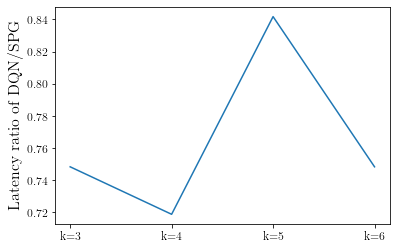

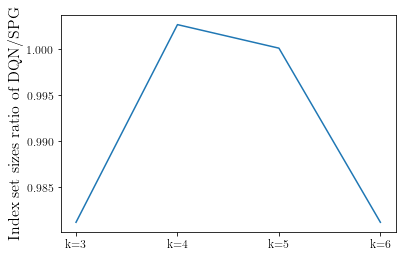

In [190]:
fig = plt.figure()
plt.ylabel('Latency ratio of DQN/SPG', fontsize=fs)
plt.plot(['k=3','k=4','k=5','k=6'],ratio_latency_dqn_spg)
plt.show()
plt.ylabel('Index set sizes ratio of DQN/SPG', fontsize=fs)
plt.plot(['k=3','k=4','k=5','k=6'],ratio_idx_size_dqn_spg)
plt.show()

In [124]:
n_selections = 3
print(np.random.choice(np.arange(n_selections) + 1, p=np.array([1,2,3])/6))

2


<br style="line-height:1000%">

## train results

In [44]:
def sma(time_series, window):
    """
    Args:
        times_series (np.ndarray)
        window (int)
    """
    sma = pd.DataFrame(time_series).rolling(window).mean().values.flatten() 
    # 1st window-1 values are nan
    nan_idxs = np.isnan(sma)
    sma[nan_idxs] = time_series[nan_idxs]
    return sma

(500,)


Text(0.5, 1.0, 'dqn loss curve')

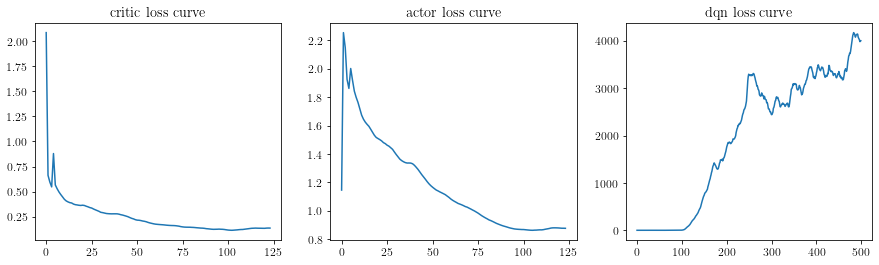

In [57]:
import numpy as np
import re

agent = 'spg'
res_subdir=res_subdir = res_dir + '/' + agent
train_loss =np.loadtxt(os.path.join(res_subdir, 'losses.txt'),delimiter=',')

#actor loss
train_actor_loss = train_loss[:,0]
plot_len = int(len(train_actor_loss)/25)*25 
train_actor_loss = train_actor_loss[0:plot_len]

train_actor_loss = train_actor_loss.reshape(-1,25).mean(axis=1)

#critic loss
train_critic_loss = train_loss[:,1]
plot_len = int(len(train_critic_loss)/25)*25 
train_critic_loss = train_critic_loss[0:plot_len]

train_critic_loss = train_critic_loss.reshape(-1,25).mean(axis=1)


agent = 'dqn'
res_subdir=res_subdir = res_dir + '/' + agent
dqn_train_loss =np.loadtxt(os.path.join(res_subdir, 'losses.txt'),delimiter=',')

#actor loss
plot_len = int(len(dqn_train_loss )/25)*25 
dqn_train_loss = dqn_train_loss[0:plot_len]

dqn_train_loss = dqn_train_loss.reshape(-1,25).mean(axis=1)


print(np.shape(dqn_loss))

fig = plt.figure(figsize=(15,4))    
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['font.size'] = 12

sma_window = 5

# rewards
ax = fig.add_subplot(1,3,1) 
ax.plot(sma(train_critic_loss , sma_window))
ax.set_title('critic loss curve')

ax = fig.add_subplot(1,3,2) 
ax.plot(sma(train_actor_loss  , sma_window))
ax.set_title('actor loss curve')

ax = fig.add_subplot(1,3,3)
ax.plot(sma(dqn_train_loss  , sma_window))
ax.set_title('dqn loss curve')


In [46]:
def see_train_summary(agent):

    #
    # data
    #
    res_subdir = res_dir + '/' + agent

    n_queries_per_episode = 25
    

    # per step
    train_query_times = np.loadtxt(os.path.join(res_subdir, 'train_query_times.txt'))
    train_query_times = train_query_times.reshape(-1, n_queries_per_episode).mean(axis=1)

    train_rewards = np.loadtxt(os.path.join(res_subdir, 'train_rewards.txt'))
    train_rewards = train_rewards.reshape(-1, n_queries_per_episode).mean(axis=1)

    # per episode of steps
    train_index_set_stats = np.loadtxt(os.path.join(res_subdir, 'train_index_set_stats.csv'), delimiter=',')

    train_index_set_sizes = train_index_set_stats[:,4] # size of index set over episode
    train_index_sizes = train_index_set_stats[:,3] # avg # of attributes per index over episode
    train_actions = train_index_set_stats[:,:3]


    #
    # visualize data
    #
    fig = plt.figure(figsize=(30,4))    
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['font.size'] = 12

    sma_window = 5



    # rewards
    ax = fig.add_subplot(1,5,1) 
    ax.plot(sma(train_rewards, sma_window))
    ax.set_title('Average reward')


    # query times
    ax = fig.add_subplot(1,5,2) 
    ax.plot(sma(train_query_times, sma_window))
    ax.set_title('Average query execution time (s) over episode')

    # index set size, at end of episode
    ax = fig.add_subplot(1,5,3) 
    ax.plot(sma(train_index_set_sizes, sma_window))
    ax.set_title('Index set size (MB) at end of episode')


    # TODO 
    # could condense https://matplotlib.org/tutorials/intermediate/gridspec.html

    # index decision distribution
    ax = fig.add_subplot(1,5,4)

    # TODO BUG ?! in controller I'd think ?1
    bar_labels = ['index', 'duplicate\_index', 'noop'] if agent == 'dqn' else ['index', 'duplicate\_index', 'noop']
    bar_loc = range(len(train_actions))

    bottom = np.zeros(len(train_actions))
    bars = []
    
#     import pdb; pdb.set_trace()
    train_actions_T = train_actions.T[::-1] # row as action type for entire episode, starting with index
    train_actions_T = train_actions_T * n_queries_per_episode # # of times took this action

    for train_action_T in train_actions_T: 
        rowsvalues = train_action_T
        bar = ax.bar(bar_loc, rowsvalues, bottom=bottom)
        bars.append(bar)

        bottom = bottom + np.array(rowsvalues)

    ax.legend(list(map(lambda t: t[0], bars))[::-1], bar_labels[::-1], frameon=True)

    ax.set_title('Indexing decision distribution over each episode')

    # index attributes
    ax = fig.add_subplot(1,5,5)
    ax.plot(train_index_sizes)
    ax.set_title('Avg count of index columns per index over each episode')
 
    fig.suptitle('{} training'.format(agent), fontsize=16, x=0.50, y=1.0)
    
    #return fig

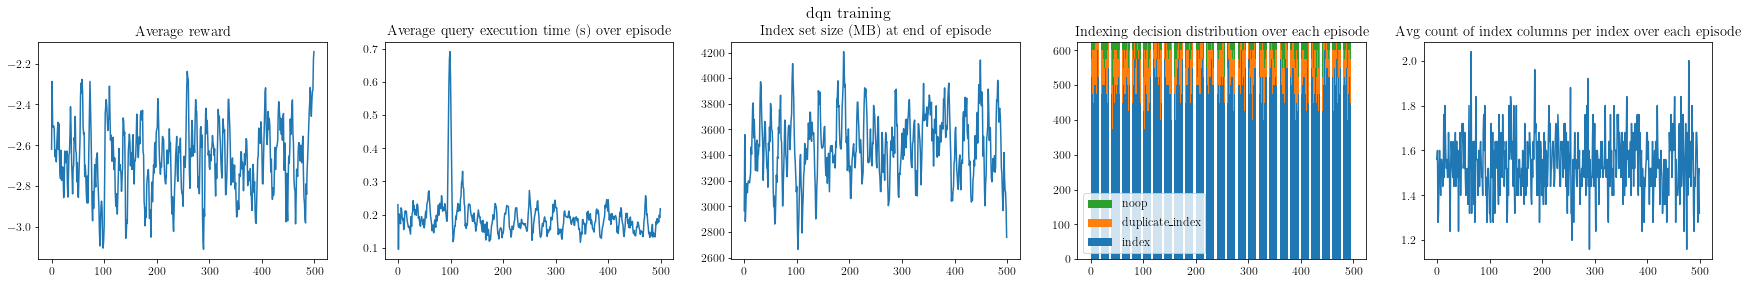

In [47]:
see_train_summary('dqn')

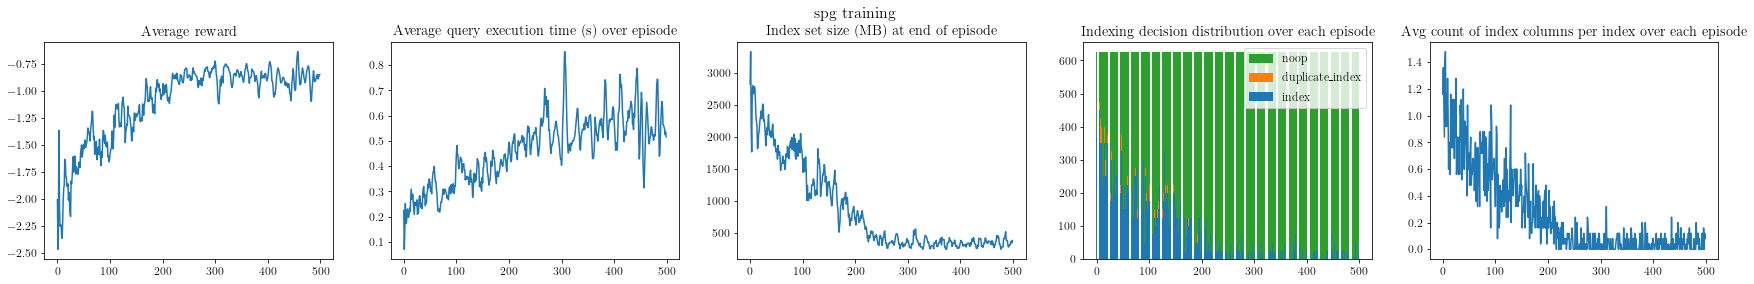

In [48]:
see_train_summary('spg')

In [93]:
# selectivity, intersection statistics

agent = 'dqn'
    
res_subdir = res_dir + '/' + agent

# 3-tuple per step of
#   avg selectivity of query cols
#   avg selectivity of index cols in index suggested by agent, 
#   avg selectivity of index cols in index actually used
selectivity = np.loadtxt(os.path.join(res_subdir, 'train_selectivity.txt'), delimiter=',')


# 2-tuple per step of intxn_opp, intxn_opp_taken
intxns = np.loadtxt(os.path.join(res_subdir, 'train_intersections.txt'), delimiter=',')


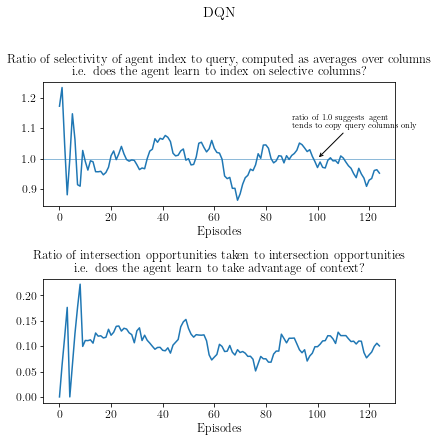

In [94]:
n_queries_per_episode = 20

agent_selectivity = selectivity[:,1]/selectivity[:,0]
agent_selectivity_by_episode = agent_selectivity.reshape(-1, n_queries_per_episode)

# mean or median?
# 0's caused by noops i.e. agent noops
agent_selectivity_by_episode_stats = np.array([np.mean(episode[episode != 0]) 
                                              for episode in agent_selectivity_by_episode])


intxn_opps_and_oops_taken_by_ep = np.sum(intxns.reshape(-1, n_queries_per_episode, 2), axis=1)
intxn_stats = intxn_opps_and_oops_taken_by_ep[:,1] / intxn_opps_and_oops_taken_by_ep[:,0]

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(211)
ax1.plot(sma(agent_selectivity_by_episode_stats, 10)) 
ax1.set_title('Ratio of selectivity of agent index to query, computed as averages over columns' \
              '\n i.e. does the agent learn to index on selective columns?', fontsize=12.5)
ax1.axhline(y=1.0, linewidth=0.5)
ax1.set_xlabel('Episodes')

ax1.annotate('ratio of 1.0 suggests agent \n tends to copy query columns only', 
             xy=(100, 1.0), xytext=(90, 1.1),
            arrowprops=dict(arrowstyle='->'),
            fontsize=8)

ax2 = fig.add_subplot(212)
ax2.plot(sma(intxn_stats, 10)) 
ax2.set_title('Ratio of intersection opportunities taken to intersection opportunities' \
              '\n i.e. does the agent learn to take advantage of context?', fontsize=12.5)
ax2.set_xlabel('Episodes')

fig.suptitle(agent.upper(), x=0.5, y=1.02)
plt.tight_layout()

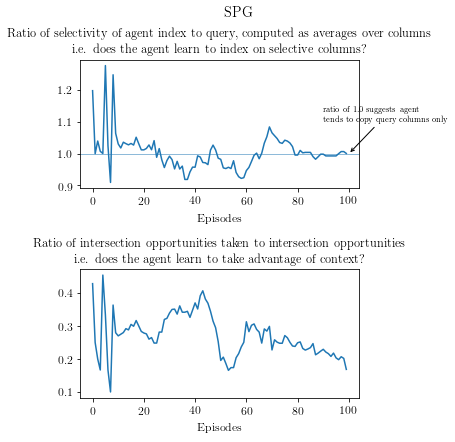

In [123]:
fig